In [ ]:
####TWITTER API####

In [ ]:
# # Variables used to access twitter API
# ACCESS_TOKEN = ''
# ACCESS_TOKEN_SECRET = ''
# CONSUMER_KEY = ''
# CONSUMER_SECRET = ''

# #Allow us to listen to tweets based on certain keywords
# from tweepy.streaming import StreamListener
# #Responsible for authenticating credentials
# from tweepy import OAuthHandler
# from tweepy import Stream

# # # # # TWITTER AUTHENTICATER # # # #
# class TwitterAuthenticator():

#     def authenticate_twitter_app(self):
#         auth = OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
#         auth.set_access_token(ACCESS_TOKEN, ACCESS_TOKEN_SECRET)
#         return auth


# # # # # TWITTER STREAMER # # # #
# class TwitterStreamer():
#     """
#     Class for streaming and processing live tweets.
#     """

#     def __init__(self):
#         self.twitter_autenticator = TwitterAuthenticator()

#     def stream_tweets(self, fetched_tweets_filename, hash_tag_list):
#         # This handles Twitter authetification and the connection to Twitter Streaming API
#         listener = TwitterListener(fetched_tweets_filename)
#         auth = self.twitter_autenticator.authenticate_twitter_app()
#         stream = Stream(auth, listener)

#         # This line filter Twitter Streams to capture data by the keywords:
#         stream.filter(track=hash_tag_list)


# # # # # TWITTER STREAM LISTENER # # # #
# class TwitterListener(StreamListener):
#     """
#     This is a basic listener that just prints received tweets to stdout.
#     """

#     def __init__(self, fetched_tweets_filename):
#         self.fetched_tweets_filename = fetched_tweets_filename

#     def on_data(self, data):
#         try:
#             print(data)
#             with open(self.fetched_tweets_filename, 'a') as tf:
#                 tf.write(data)
#             return True
#         except BaseException as e:
#             print("Error on_data %s" % str(e))
#         return True

#     def on_error(self, status):
#         if status == 420:
#             # Returning False on_data method in case rate limit occurs.
#             return False
#         print(status)


# if __name__ == '__main__':
#     # Authenticate using config.py and connect to Twitter Streaming API.
#     #This is the hashtags tweepy will look for on twitter, 
#     #I updated it a bit to include some hashtags specific to the disney parks
#     hash_tag_list = ["disneylandresort", "disneyland", "disneyresort",
#                      "CaliforniaAdventure",'downtowndisney','disneyanaheim',
#                      'disneylandanaheim','disneycalifornia','californiadisney',
#                      'disneysea', 'disneytokyo', 'disneytokyoresort', 'tokyodisney',
#                      'tokyodisneyresort', 'tokyodisneyland',
#                      '東京ディズニーランド', 'ディズニーランド',
#                      '東京ディズニーシー', 'ズニーシー', 'tdr_now', 'tdr_md'
#                      'tdrmd', 'tdrnow', 'disneypark', 'dca']

#     #Wanted to collect tweets related to the Chinese New Year festivities 
#     fetched_tweets_filename = "disresortcny.json"
#     twitter_streamer = TwitterStreamer()
#     twitter_streamer.stream_tweets(fetched_tweets_filename, hash_tag_list)

In [ ]:
#### Wrangling Cleaning Preprocessing ####

In [1]:
#import pandas
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import emoji
import re
from bs4 import BeautifulSoup

# Set iPython's max column width to 1000
pd.set_option('display.max_columns', 1000)
pd.set_option('display.max_colwidth', -1)
pd.options.display.float_format = '{:,.0f}'.format


In [2]:
#load in json file
file = 'disresortcny.json'
df = pd.read_json(file,lines = True)

In [3]:
#select columns we want
df = df[['text','id',
          'lang','created_at',
          'user','source','retweeted_status',
          'extended_tweet', 'entities',
         'place', 'truncated', 'quoted_status','favorite_count',
         'reply_count', 'retweet_count', 'quote_count', 'in_reply_to_user_id']]

In [4]:
#Select only Japanese and English Text
df = df[(df['lang'] == 'ja') | (df['lang'] == 'en')]

In [5]:
#quoted status nested dictionary
df['quote_created_at'] = [d.get('created_at') if type(d) == dict else np.nan
                        for d in df['quoted_status']]
df['quote_text'] =  [d.get('text') if type(d) == dict else np.nan
                 for d in df['quoted_status']]
df['quoted_retweet_count'] = [d.get('retweet_count') if type(d) == dict else np.nan
                           for d in df['quoted_status']]
df['quoted_favorite_count'] = [d.get('favorite_count') if type(d) == dict else np.nan
                            for d in df['quoted_status']]
df['quoted_lang'] = [d.get('lang') if type(d) == dict else np.nan
                  for d in df['quoted_status']]

In [6]:
#retweeted status nested dictionary
df['rt_created_at'] = [d.get('created_at') if type(d) == dict else np.nan
                        for d in df['retweeted_status']]
df['rt_reply_count'] = [d.get('reply_count') if type(d) == dict else np.nan
                        for d in df['retweeted_status']]
df['rt_id'] =  [d.get('id') if type(d) == dict else np.nan
                 for d in df['retweeted_status']]
df['rt_text'] = [d.get('text') if type(d) == dict else np.nan
                  for d in df['retweeted_status']]
df['rt_source'] = [d.get('source') if type(d) == dict else np.nan
                    for d in df['retweeted_status']]
df['rt_user'] = [d.get('user') if type(d) == dict else np.nan
                  for d in df['retweeted_status']]
df['rt_retweet_count'] = [d.get('retweet_count') if type(d) == dict else np.nan
                           for d in df['retweeted_status']]
df['rt_favorite_count'] = [d.get('favorite_count') if type(d) == dict else np.nan
                            for d in df['retweeted_status']]
df['rt_lang'] = [d.get('lang') if type(d) == dict else np.nan
                  for d in df['retweeted_status']]

df['rt_extended_tweet'] = [d.get('extended_tweet') if type(d) == dict
                          else np.nan for d in df['retweeted_status']]

df['rt_full_text'] = [d.get('full_text') if type(d) == dict
                          else np.nan for d in df['rt_extended_tweet']]
df['rt_user_id'] = [d.get('id') if type(d) == dict
                          else np.nan for d in df['rt_user']]
df['rt_user_screen_name'] = [d.get('screen_name') if type(d) == dict
                          else np.nan for d in df['rt_user']]
df['rt_user_location'] = [d.get('location') if type(d) == dict
                          else np.nan for d in df['rt_user']]
df['rt_user_follower_count'] = [d.get('followers_count') if type(d) == dict
                          else np.nan for d in df['rt_user']]
df['rt_user_friends_count'] = [d.get('friends_count') if type(d) == dict
                          else np.nan for d in df['rt_user']]
df['rt_user_listed_count'] = [d.get('listed_count') if type(d) == dict
                          else np.nan for d in df['rt_user']]
df['rt_user_favorites_count'] = [d.get('favourites_count') if type(d) == dict
                          else np.nan for d in df['rt_user']]
df['rt_user_created_at'] = [d.get('created_at') if type(d) == dict
                          else np.nan for d in df['rt_user']]

df['rt_user_description'] = [d.get('extended_tweet') if type(d) == dict
                          else np.nan for d in df['rt_user']]

In [7]:
#pull out extended Tweets
df['ex_tw_full_text'] = [d.get('full_text') if type(d) == dict else np.nan
                          for d in df['extended_tweet']]

In [8]:
#selecting dictionaries from user, nested dictionary

df['user_id'] = [d.get('id') if type(d) == dict else np.nan
                          for d in df['user']]
df['user_name'] = [d.get('name') if type(d) == dict else np.nan
                          for d in df['user']]
df['user_screen_name'] = [d.get('screen_name') if type(d) == dict else np.nan
                          for d in df['user']]
df['user_location'] = [d.get('location') if type(d) == dict else np.nan
                          for d in df['user']]
df['user_description'] = [d.get('description') if type(d) == dict else np.nan
                          for d in df['user']]
df['user_fol_count'] = [d.get('followers_count') if type(d) == dict else np.nan
                          for d in df['user']]
df['user_fr_count'] = [d.get('friends_count') if type(d) == dict else np.nan
                          for d in df['user']]
df['user_fav_count'] = [d.get('favourites_count') if type(d) == dict else np.nan
                          for d in df['user']]
df['user_status_count'] = [d.get('statuses_count') if type(d) == dict else np.nan
                          for d in df['user']]
df['user_created_at'] = [d.get('created_at') if type(d) == dict else np.nan
                          for d in df['user']]
df['user_listed_count'] = [d.get('listed_count') if type(d) == dict else np.nan
                          for d in df['user']]


In [9]:
#Clean up the source
df['source']= df['source'].replace(np.nan, '')
#df['source'] = [BeautifulSoup(text).get_text() if type(text) == dict else np.nan for text in df['source']]
df['source'] = [BeautifulSoup(text).get_text() for text in df['source']]
#clean rt_source
df['rt_source']= df['rt_source'].replace(np.nan, '')
df['rt_source'] = [BeautifulSoup(text).get_text() if text != np.nan else np.nan for text in df['rt_source']]

In [10]:
#change the date time column
df['created_at'] = pd.to_datetime(df['created_at'])
df['rt_created_at'] = pd.to_datetime(df['rt_created_at'])
df['quote_created_at'] = pd.to_datetime(df['quote_created_at'])
df['rt_user_created_at'] = pd.to_datetime(df['rt_user_created_at'])
df['user_created_at'] = pd.to_datetime(df['user_created_at'])

In [11]:
df = df.drop(columns = ['user', 'retweeted_status', 'entities', 'quoted_status', 'rt_extended_tweet', 'rt_user', 'extended_tweet',
                       'place'])

In [12]:
df.columns

Index(['text', 'id', 'lang', 'created_at', 'source', 'truncated',
       'favorite_count', 'reply_count', 'retweet_count', 'quote_count',
       'in_reply_to_user_id', 'quote_created_at', 'quote_text',
       'quoted_retweet_count', 'quoted_favorite_count', 'quoted_lang',
       'rt_created_at', 'rt_reply_count', 'rt_id', 'rt_text', 'rt_source',
       'rt_retweet_count', 'rt_favorite_count', 'rt_lang', 'rt_full_text',
       'rt_user_id', 'rt_user_screen_name', 'rt_user_location',
       'rt_user_follower_count', 'rt_user_friends_count',
       'rt_user_listed_count', 'rt_user_favorites_count', 'rt_user_created_at',
       'rt_user_description', 'ex_tw_full_text', 'user_id', 'user_name',
       'user_screen_name', 'user_location', 'user_description',
       'user_fol_count', 'user_fr_count', 'user_fav_count',
       'user_status_count', 'user_created_at', 'user_listed_count'],
      dtype='object')

In [13]:
df.loc[0:50, ['text', 'truncated', 'ex_tw_full_text','rt_text', 'rt_full_text']]

,text,truncated,ex_tw_full_text,rt_text,rt_full_text
0,だから、Dヲタきもいし、非常識って思われんだよ。\n\n気持ち悪い,False,NaN,NaN,NaN
1,RT @TomerAzarly: Someone sent me this video of the Fab Five at Disneyland honoring Kobe Bryant by breaking their huddle with the ‘Kobe!’ ju…,False,NaN,Someone sent me this video of the Fab Five at Disneyland honoring Kobe Bryant by breaking their huddle with the ‘Ko… https://t.co/VoUzqHlG77,Someone sent me this video of the Fab Five at Disneyland honoring Kobe Bryant by breaking their huddle with the ‘Kobe!’ jump shot gesture. https://t.co/HEFtUQ3NEU
3,RT @TomerAzarly: Someone sent me this video of the Fab Five at Disneyland honoring Kobe Bryant by breaking their huddle with the ‘Kobe!’ ju…,False,NaN,Someone sent me this video of the Fab Five at Disneyland honoring Kobe Bryant by breaking their huddle with the ‘Ko… https://t.co/VoUzqHlG77,Someone sent me this video of the Fab Five at Disneyland honoring Kobe Bryant by breaking their huddle with the ‘Kobe!’ jump shot gesture. https://t.co/HEFtUQ3NEU
4,"RT @MouseInfo: FIRST LOOK at the ride vehicle for The Happy Ride with Baymax, opening April 15 at Tokyo Disneyland https://t.co/VqFTb0pS5T",False,NaN,"FIRST LOOK at the ride vehicle for The Happy Ride with Baymax, opening April 15 at Tokyo Disneyland https://t.co/VqFTb0pS5T",NaN
5,RT @TomerAzarly: Someone sent me this video of the Fab Five at Disneyland honoring Kobe Bryant by breaking their huddle with the ‘Kobe!’ ju…,False,NaN,Someone sent me this video of the Fab Five at Disneyland honoring Kobe Bryant by breaking their huddle with the ‘Ko… https://t.co/VoUzqHlG77,Someone sent me this video of the Fab Five at Disneyland honoring Kobe Bryant by breaking their huddle with the ‘Kobe!’ jump shot gesture. https://t.co/HEFtUQ3NEU
6,RT @TomerAzarly: Someone sent me this video of the Fab Five at Disneyland honoring Kobe Bryant by breaking their huddle with the ‘Kobe!’ ju…,False,NaN,Someone sent me this video of the Fab Five at Disneyland honoring Kobe Bryant by breaking their huddle with the ‘Ko… https://t.co/VoUzqHlG77,Someone sent me this video of the Fab Five at Disneyland honoring Kobe Bryant by breaking their huddle with the ‘Kobe!’ jump shot gesture. https://t.co/HEFtUQ3NEU
7,"I had booked my first two nights in Anaheim, which is quite a long way from the centre of LA. It’s where Disneyland… https://t.co/PEFZ2xecyq",True,"I had booked my first two nights in Anaheim, which is quite a long way from the centre of LA. It’s where Disneyland is, and my plan was to pay a visit the next day before heading downtown.",NaN,NaN
8,RT @TomerAzarly: Someone sent me this video of the Fab Five at Disneyland honoring Kobe Bryant by breaking their huddle with the ‘Kobe!’ ju…,False,NaN,Someone sent me this video of the Fab Five at Disneyland honoring Kobe Bryant by breaking their huddle with the ‘Ko… https://t.co/VoUzqHlG77,Someone sent me this video of the Fab Five at Disneyland honoring Kobe Bryant by breaking their huddle with the ‘Kobe!’ jump shot gesture. https://t.co/HEFtUQ3NEU
9,RT @TomerAzarly: Someone sent me this video of the Fab Five at Disneyland honoring Kobe Bryant by breaking their huddle with the ‘Kobe!’ ju…,False,NaN,Someone sent me this video of the Fab Five at Disneyland honoring Kobe Bryant by breaking their huddle with the ‘Ko… https://t.co/VoUzqHlG77,Someone sent me this video of the Fab Five at Disneyland honoring Kobe Bryant by breaking their huddle with the ‘Kobe!’ jump shot gesture. https://t.co/HEFtUQ3NEU
10,RT @TomerAzarly: Someone sent me this video of the Fab Five at Disneyland honoring Kobe Bryant by breaking their huddle with the ‘Kobe!’ ju…,False,NaN,Someone sent me this video of the Fab Five at Disneyland honoring Kobe Bryant by breaking their huddle with the ‘Ko… https://t.co/VoUzqHlG77,Someone sent me this video of the Fab Five at Disneyland honoring Kobe Bryant by breaking their huddle with the ‘Kobe!’ jump shot gesture. https://t.co/HEFtUQ3NEU


In [14]:
#combining text columns tweets
df['text'] = df['text'].replace(np.nan,'')
df['len_text'] = df['text'].apply(len)
df['combo_text'] = np.where(df['len_text'] < 140, df['text'], df['ex_tw_full_text'])
df['combo_text'] = df['combo_text'].replace(np.nan,'')

#combining text columns retweets
df['rt_text'] = df['rt_text'].replace(np.nan,'')
df['rt_len'] = df['rt_text'].apply(len)
df['rtcombo_text'] = np.where(df['rt_len'] < 140, df['rt_text'], df['rt_full_text'])
df['rtcombo_text'] = df['rtcombo_text'].replace(np.nan,'')

#combining retweets and tweets
df['rtcombo_len'] = df['rtcombo_text'].apply(len)
df['full_text'] = np.where(df['rtcombo_len'] == 0, df['combo_text'], df['rtcombo_text'])

In [15]:
df['full_text'][24:50]

30    Someone sent me this video of the Fab Five at Disneyland honoring Kobe Bryant by breaking their huddle with the ‘Kobe!’ jump shot gesture. https://t.co/HEFtUQ3NEU                                                                                                                                          
31    Someone sent me this video of the Fab Five at Disneyland honoring Kobe Bryant by breaking their huddle with the ‘Kobe!’ jump shot gesture. https://t.co/HEFtUQ3NEU                                                                                                                                          
32    Someone sent me this video of the Fab Five at Disneyland honoring Kobe Bryant by breaking their huddle with the ‘Kobe!’ jump shot gesture. https://t.co/HEFtUQ3NEU                                                                                                                                          
33    Dumbo Number 8 at Disneyland was down and covered for Kobe and his family

In [ ]:
####Translate Japanese Text to English export to excel for google translation then bring back as word document####

In [16]:
#Drop duplicate tweets that were retweeted during collection period 
df2 = df.drop_duplicates(subset = 'full_text')

In [17]:
df2['full_text']

0        だから、Dヲタきもいし、非常識って思われんだよ。\n\n気持ち悪い                                                                                                                                                                       
1        Someone sent me this video of the Fab Five at Disneyland honoring Kobe Bryant by breaking their huddle with the ‘Kobe!’ jump shot gesture. https://t.co/HEFtUQ3NEU                                      
4        FIRST LOOK at the ride vehicle for The Happy Ride with Baymax, opening April 15 at Tokyo Disneyland https://t.co/VqFTb0pS5T                                                                             
7        I had booked my first two nights in Anaheim, which is quite a long way from the centre of LA. It’s where Disneyland is, and my plan was to pay a visit the next day before heading downtown.            
14       Dumbo Number 8 at Disneyland was down and covered for Kobe and his family.  He loved going to Disneyland. https://t.co/8kgQk5BqRb                      

In [18]:
df_ja = df2[df['lang'] == 'ja']
df_en = df2[df['lang'] == 'en']
df_ja['full_text'].to_csv('cny_ja.csv')

In [ ]:
#https://translate.google.com/#view=home&op=docs&sl=auto&tl=en

In [19]:
import io
import csv
from docx import Document

def read_docx_tables(filename, tab_id=None, **kwargs):
    """
    parse table(s) from a Word Document (.docx) into Pandas DataFrame(s)

    Parameters:
        filename:   file name of a Word Document

        tab_id:     parse a single table with the index: [tab_id] (counting from 0).
                    When [None] - return a list of DataFrames (parse all tables)

        kwargs:     arguments to pass to `pd.read_csv()` function

    Return: a single DataFrame if tab_id != None or a list of DataFrames otherwise
    """
    def read_docx_tab(tab, **kwargs):
        vf = io.StringIO()
        writer = csv.writer(vf)
        for row in tab.rows:
            writer.writerow(cell.text for cell in row.cells)
        vf.seek(0)
        return pd.read_csv(vf, **kwargs)

    doc = Document(filename)
    if tab_id is None:
        return [read_docx_tab(tab, **kwargs) for tab in doc.tables]
    else:
        try:
            return read_docx_tab(doc.tables[tab_id], **kwargs)
        except IndexError:
            print('Error: specified [tab_id]: {}  does not exist.'.format(tab_id))
            raise

In [20]:
translate = read_docx_tables('cny_goog_translate.docx', header = None)

In [21]:
dftrans = pd.DataFrame(translate[0])
dftrans.columns = ['index','trans_text']
dftrans.set_index('index')

,trans_text
index,
0,"So, D and nerd Kimoi, I think I insane.\n \nCreepy"
64,"Even if he gets angry at the station staff, he ignores it and continues to sleep in his sleeping bag. I want to know where the heart that can do this and get to the park is born.\n#TDR_now"
89,May Doll\nFrom affordable prices to full-scale prices\n1 day release\n \nMissing officially\nGoods\nChildrens day\nBoys' Festival\n \nMickey mark on armor\nMickey\n2900 jpy\n \nIn a carp streamer\nDonald is mischievous\nMikidona\n4100 yen\n \nDignified\nWith bow sword decoration\nMickey\n18400 yen\n \n \n#TDR_MD \n#TDR_now
102,"LA at Disneyland, Kobe tribute to the ... 🐁🐁🦆🐄🐕 Thank you."
104,This year is Donald !\n(Last year Mickey\nChildrens day\nBoys' Festival\nAcrylic stand and others\n \nNot officially listed\nGoods\n2 May 1 day sale\n \nChip and Dale\ncarp streamer\nPin badge\n \nFan cap\nDale\nToy story\nSlinky • Dog\n \nhat\nEar hat\nMinnie\n \n \n \n#TDR_now \n#TDR_MD
...,...
10714,Exchange\n \nDisneyland Verimini Capsule Toy Lotto \n \nYuzuru ) Minio\nRequired ) observe carefully or Princess\n \nI'm currently in the land\nOr exchange tomorrow at Land\n \nThank you.
10726,"[Exchange hope]\n \nDisneyland Capsule Toy Minnie\n \nYuzuru → Preday, Dammani, Verimini\nAsk → Minio, Miss Mass, Mishica\n \nI'm in the land today.\nThank you.\nVerimini wants to exchange Mishica\n \n #tdr_trade"
10730,One frame at Disneyland 😳\nI'm so excited\n \n# Boyfriend's eyes # Disneyland # You can use it to date her\n \nLet's enjoy the videos posted by Tsuji Lewis @ Otsumami ! #TikTok


In [22]:
df_ja = df_ja.reset_index(drop = True)
dftrans = dftrans.reset_index(drop = True)
df_en = df_en.reset_index(drop = True)
df_en['google_trans'] = 'None'

In [23]:
dftrans.columns = ['index', 'goog_trans']
df_ja['google_trans'] = dftrans['goog_trans']

In [24]:
df_ja.loc[:,['google_trans', 'full_text']]

,google_trans,full_text
0,"So, D and nerd Kimoi, I think I insane.\n \nCreepy",だから、Dヲタきもいし、非常識って思われんだよ。\n\n気持ち悪い
1,"Even if he gets angry at the station staff, he ignores it and continues to sleep in his sleeping bag. I want to know where the heart that can do this and get to the park is born.\n#TDR_now",駅員に怒られても無視して寝袋で寝続け、後ろはそれを無視しながらケータイをいじり続ける。こんなことをやっていて胸を張ってパークに行ける心がどこから生まれるのか知りたい。\n#TDR_now https://t.co/wImIGwTMsR
2,May Doll\nFrom affordable prices to full-scale prices\n1 day release\n \nMissing officially\nGoods\nChildrens day\nBoys' Festival\n \nMickey mark on armor\nMickey\n2900 jpy\n \nIn a carp streamer\nDonald is mischievous\nMikidona\n4100 yen\n \nDignified\nWith bow sword decoration\nMickey\n18400 yen\n \n \n#TDR_MD \n#TDR_now,五月人形\nお手頃価格から本格的料金迄\n1日発売\n\n公式に掲載が見当たらない\nグッズ\nこどもの日\n端午の節句\n\n鎧兜にもミッキーマーク\nミッキー\n2900円\n\n鯉のぼりに入っている\nドナルドがお茶目\nミキドナ\n4100円\n\n凛々しく\n弓太刀飾り付き\nミッキー\n18400円\n https://t.co/PuqlYXIDa8\n\n#TDR_MD \n#TDR_now https://t.co/LJW1aiJXko
3,"LA at Disneyland, Kobe tribute to the ... 🐁🐁🦆🐄🐕 Thank you.",LAのディズニーランドでも、Kobeへのトリビュートが... 🐁🐁🦆🐄🐕 ありがとう。
4,This year is Donald !\n(Last year Mickey\nChildrens day\nBoys' Festival\nAcrylic stand and others\n \nNot officially listed\nGoods\n2 May 1 day sale\n \nChip and Dale\ncarp streamer\nPin badge\n \nFan cap\nDale\nToy story\nSlinky • Dog\n \nhat\nEar hat\nMinnie\n \n \n \n#TDR_now \n#TDR_MD,今年はドナルド!\n（去年 ミッキー\nこどもの日\n端午の節句\nアクリルスタンド 他\n\n公式に掲載がない\nグッズ\n2月1日発売\n\nチップとデール\n鯉のぼり\nピンバッジ\n\nファンキャップ\nデール\nトイストーリー\nスリンキー•ドッグ\n\n帽子\nイヤーハット\nミニーちゃん\n\n https://t.co/GZD6pCVVpQ\n\n#TDR_now \n#TDR_MD https://t.co/HZL4apJ75u
...,...,...
479,Exchange\n \nDisneyland Verimini Capsule Toy Lotto \n \nYuzuru ) Minio\nRequired ) observe carefully or Princess\n \nI'm currently in the land\nOr exchange tomorrow at Land\n \nThank you.,交換\n\nディズニーランド ベリミニ カプセルトイ ガチャ \n\n譲)ミニオ\n求)ミスマス or プリンセス\n\n現在ランドにいます\nもしくは明日ランドで交換も可\n\nよろしくお願いします。 https://t.co/nn6znGUGdU
480,"[Exchange hope]\n \nDisneyland Capsule Toy Minnie\n \nYuzuru → Preday, Dammani, Verimini\nAsk → Minio, Miss Mass, Mishica\n \nI'm in the land today.\nThank you.\nVerimini wants to exchange Mishica\n \n #tdr_trade",【交換希望】\n \nディズニーランド カプセルトイ ミニー\n\n譲→プリデイ、ダンマニ、ベリミニ\n求→ミニオ、ミスマス、ミシカ\n\n本日ランドにインしています。\nよろしくお願いします。\nなおべリミニはミシカ交換希望です·ᴥ·\n\n #tdr_trade
481,One frame at Disneyland 😳\nI'm so excited\n \n# Boyfriend's eyes # Disneyland # You can use it to date her\n \nLet's enjoy the videos posted by Tsuji Lewis @ Otsumami ! #TikTok,ディズニーランドでの一コマ😳\nめちゃめちゃはしゃぐ私\n\n#彼氏目線 #ディズニーランド #彼女とデートなうに使っていいよ\n\nツジルイス🐰🌐おつまみちゃんの投稿動画を楽しみましょう！#TikTok https://t.co/kHT3UBlkjY
482,"[Exchange hope]\n Disneyland Berry Berry Minnie Capsule Toy \n \nYone → Minio, Princess\nRequest → Itsuberi\n \nI am in the land today. Thank you very much. \n#tdr_trade",【交換希望】\n ディズニーランド ベリーベリーミニー カプセルトイ \n\n譲→ミニオ、プリンセス\n求→イツベリ\n\n本日ランドにおります。よろしくお願いします😭 \n#tdr_trade https://t.co/Bm6zWz5DiT


In [25]:
#Selecting text column used for ML
df3 = pd.concat([df_en, df_ja]).sort_values('created_at')
df3 = df3.reset_index(drop = True)
df3 = df3.loc[:,['full_text','google_trans', 'text', 'rt_text','lang']]
df3['google_trans'] = df3['google_trans'].replace(np.nan, 'None')
df3['en_ja_goog'] = np.where((df3['google_trans'] == 'None'), df3['full_text'], df3['google_trans'])
df3['en_ja_goog'] = df3['en_ja_goog'].astype(str)

In [ ]:
#### ML Preprocessing ######

In [26]:
import nltk
import string
import re
#bokeh 
from bokeh.io import show, output_notebook
from bokeh.models import ColumnDataSource, Panel, Tabs, FactorRange
from bokeh.models import HoverTool
from bokeh.plotting import figure
from bokeh.models.widgets import DataTable, DateFormatter, TableColumn
from bokeh.palettes import Spectral5
import bokeh.layouts as layouts
from bokeh.layouts import row
import bokeh.models.widgets as widgets
from bokeh.io import curdoc
from bokeh.transform import factor_cmap
from bokeh.transform import dodge
output_notebook()

Loading BokehJS ...

In [27]:
#extract link for tweet
def tweet_link(link):
    words = link.split()
    links = [word for word in words if word.startswith('http')]
    return links

#extract Hashtags
def hashtags(string):
    words = string.split()
    hashtags = [word for word in words if word.startswith('#')]
    return hashtags

#hashtag count
def hash_count(string):
    words = string.split()
    hashtags = [word for word in words if word.startswith('#')]
    return len(hashtags)

#Extract mention
def mention(string):
    words = string.split()
    mention = [word for word in words if word.startswith('@')]
    return mention

#extracting the emojis
emojis_list = map(lambda x: ''.join(x.split()), emoji.UNICODE_EMOJI.keys())
r = re.compile('|'.join(re.escape(p) for p in emojis_list))

In [28]:
df3['tweet_link'] = df3['en_ja_goog'].apply(tweet_link)
df3['hashtag'] = df3['en_ja_goog'].apply(hashtags)
df3['hash_count'] = df3['en_ja_goog'].apply(hash_count)
df3['mention'] = df3['text'].apply(mention)
df3['emoji'] = df3['full_text'].str.findall(r)
df3['emoji_count'] = df3['emoji'].apply(len)

In [29]:
df3.head(10)

,full_text,google_trans,text,rt_text,lang,en_ja_goog,tweet_link,hashtag,hash_count,mention,emoji,emoji_count
0,だから、Dヲタきもいし、非常識って思われんだよ。\n\n気持ち悪い,"So, D and nerd Kimoi, I think I insane.\n \nCreepy",だから、Dヲタきもいし、非常識って思われんだよ。\n\n気持ち悪い,,ja,"So, D and nerd Kimoi, I think I insane.\n \nCreepy",[],[],0,[],[],0
1,Someone sent me this video of the Fab Five at Disneyland honoring Kobe Bryant by breaking their huddle with the ‘Kobe!’ jump shot gesture. https://t.co/HEFtUQ3NEU,None,RT @TomerAzarly: Someone sent me this video of the Fab Five at Disneyland honoring Kobe Bryant by breaking their huddle with the ‘Kobe!’ ju…,Someone sent me this video of the Fab Five at Disneyland honoring Kobe Bryant by breaking their huddle with the ‘Ko… https://t.co/VoUzqHlG77,en,Someone sent me this video of the Fab Five at Disneyland honoring Kobe Bryant by breaking their huddle with the ‘Kobe!’ jump shot gesture. https://t.co/HEFtUQ3NEU,[https://t.co/HEFtUQ3NEU],[],0,[@TomerAzarly:],[],0
2,"FIRST LOOK at the ride vehicle for The Happy Ride with Baymax, opening April 15 at Tokyo Disneyland https://t.co/VqFTb0pS5T",None,"RT @MouseInfo: FIRST LOOK at the ride vehicle for The Happy Ride with Baymax, opening April 15 at Tokyo Disneyland https://t.co/VqFTb0pS5T","FIRST LOOK at the ride vehicle for The Happy Ride with Baymax, opening April 15 at Tokyo Disneyland https://t.co/VqFTb0pS5T",en,"FIRST LOOK at the ride vehicle for The Happy Ride with Baymax, opening April 15 at Tokyo Disneyland https://t.co/VqFTb0pS5T",[https://t.co/VqFTb0pS5T],[],0,[@MouseInfo:],[],0
3,"I had booked my first two nights in Anaheim, which is quite a long way from the centre of LA. It’s where Disneyland is, and my plan was to pay a visit the next day before heading downtown.",None,"I had booked my first two nights in Anaheim, which is quite a long way from the centre of LA. It’s where Disneyland… https://t.co/PEFZ2xecyq",,en,"I had booked my first two nights in Anaheim, which is quite a long way from the centre of LA. It’s where Disneyland is, and my plan was to pay a visit the next day before heading downtown.",[],[],0,[],[],0
4,Dumbo Number 8 at Disneyland was down and covered for Kobe and his family. He loved going to Disneyland. https://t.co/8kgQk5BqRb,None,RT @ivysaysrawr: Dumbo Number 8 at Disneyland was down and covered for Kobe and his family. He loved going to Disneyland. https://t.co/8kg…,Dumbo Number 8 at Disneyland was down and covered for Kobe and his family. He loved going to Disneyland. https://t.co/8kgQk5BqRb,en,Dumbo Number 8 at Disneyland was down and covered for Kobe and his family. He loved going to Disneyland. https://t.co/8kgQk5BqRb,[https://t.co/8kgQk5BqRb],[],0,[@ivysaysrawr:],[],0
5,Why does Darren always go to Disneyland a few weeks after me this is homophobic,None,Why does Darren always go to Disneyland a few weeks after me this is homophobic,,en,Why does Darren always go to Disneyland a few weeks after me this is homophobic,[],[],0,[],[],0
6,Now Playing on DParkRadio ! Disney Parks - Magic Everywhere - Disneyland Paris ENJOY! https://t.co/eAYfCyInwo… https://t.co/WMmhm3DN0S,None,Now Playing on DParkRadio ! Disney Parks - Magic Everywhere - Disneyland Paris ENJOY! https://t.co/eAYfCyInwo… https://t.co/WMmhm3DN0S,,en,Now Playing on DParkRadio ! Disney Parks - Magic Everywhere - Disneyland Paris ENJOY! https://t.co/eAYfCyInwo… https://t.co/WMmhm3DN0S,"[https://t.co/eAYfCyInwo…, https://t.co/WMmhm3DN0S]",[],0,[],[],0
7,"Had a great time at #disneyland celebrating our upcoming addition to the family, Liam! Had to rock out the… https://t.co/gl2529YpHd",None,"Had a great time at #disneyland celebrating our upcoming addition to the family, Liam! Had to rock out the… https://t.co/gl2529YpHd",,en,"Had a great time at #disneyland celebrating our upcoming addition to the family, Liam! Had to rock out the… https://t.co/gl2529YpHd",[https://t.co/gl2529YpHd],[#disneyland],1,[],[],0
8,Theme parks of the future #disneyparks #disneyworld #Disneyland #Disney https://t.co/fSowZ

In [30]:
stopwords = nltk.corpus.stopwords.words('english')
wn = nltk.WordNetLemmatizer()
punc = lambda x: re.sub("!|,|\?|\'|-|\"|&|。|\)|\(|！|，|\.*|/|\[|\]|\u2026|\d|:|~|、|？|☆|’|– |【|】|「|」|《|》|※| “|”|＊|→||[\b\.\b]{3}||@||@ |#|# |", '',x)

#Clean
def clean_text(soup):
    soup = BeautifulSoup(soup, 'lxml')
    souped = soup.get_text()
    stripped = re.sub(r'https?://[A-Za-z0-9./]+', '', souped)
    words = stripped.split() 
    mention = [word for word in words if not word.startswith('@')]
    RT = [word for word in mention if not word.startswith('RT')]
    text = " ".join([wn.lemmatize(word) for word in RT if word not in stopwords])
    punct = "".join([word.lower() for word in text if word not in string.punctuation])
    short_words = ' '.join([w for w in punct.split() if len(w)>2])
    ja_punct = ''.join([punc(word) for word in short_words])
    tokens = re.split('\W+', ja_punct)
    return (" ".join(tokens)).strip()

In [31]:
#Cleaning the text 
df3['clean_text'] = df3['en_ja_goog'].apply(clean_text)

In [32]:
#To R to get sentiment and emotions 
df3['clean_text'].to_csv('clean_cny_text.csv')

In [33]:
#Add in our R sentiment for range of emotion
r_sent_word = pd.read_csv('r_emotion_cny.csv', index_col = 0)
r_sent_word = r_sent_word.reset_index(drop = True)
r_sent_word_counts = pd.DataFrame(r_sent_word.astype(bool).sum().reset_index())
r_sent_word_counts = r_sent_word_counts.rename(columns = {'index':'sentiment',0:'count'})

In [35]:
#Bokeh Chart 
sentiment = list(r_sent_word_counts['sentiment'])
count = list(r_sent_word_counts['count'])


source = ColumnDataSource(data=dict(sentiment=sentiment, count=count))

p = figure(x_range=sentiment, y_range=(0,1000),  plot_width=700, plot_height=700, title="R Sentiment Count",
           toolbar_location='below', tools="pan,wheel_zoom,box_zoom,reset")


p.vbar(x='sentiment', top='count', width=0.9, color = 'red', source=source)
p.title.align = 'center'
p.xgrid.grid_line_color = None
p.xaxis.major_label_orientation = "vertical"
p.left[0].formatter.use_scientific = False
p.add_tools(HoverTool(tooltips=[("sentiment", "@sentiment"), ("Total Count", "@count")]))


p.title.text_font_size = '20pt'
p.xaxis.axis_label="Sentiment"
p.xaxis.axis_label_text_font_size = "15pt"
p.xaxis.major_label_text_font_size = "15pt"
p.xaxis.axis_label_text_color = "black"
p.yaxis.axis_label="Count"
p.yaxis.axis_label_text_font_size = "15pt"
p.yaxis.major_label_text_font_size = "15pt"
p.yaxis.axis_label_text_color = "black"


tbsource = ColumnDataSource(r_sent_word_counts)

columns = [TableColumn(field = 'sentiment', title = 'Sentiment'),
          TableColumn(field = 'count', title = 'Count')]
data_table = DataTable(source = tbsource, columns = columns, width = 700, height = 700)

layout = row(p, data_table)

show(layout)

In [36]:
df3 = pd.concat([df3,r_sent_word],axis =1)

In [37]:
# load in our R tie breaker sentiment
r_sent = pd.read_csv('r_sent_cny.csv', index_col=0)
r_sent = r_sent.reset_index(drop = True)
df3['r_sentiment'] = r_sent

In [38]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()

def sentiment_analyzer_scores(sentence):
    score = analyser.polarity_scores(sentence)
    if score['compound']>= 0.05:
        return 'positive'
    elif score['compound'] <= -0.05:
        return 'negative'
    else:
        return 'neutral'
    
from textblob import TextBlob

def get_tweet_sentiment(tweet):
    # create TextBlob object of passed tweet text
    analysis = TextBlob(tweet)
    # set sentiment
    if analysis.sentiment.polarity > 0:
        return 'positive'
    elif analysis.sentiment.polarity == 0:
        return 'neutral'
    else:
        return 'negative'

In [39]:
vader = lambda x: sentiment_analyzer_scores(x)
df3['vader_score_word'] = [vader(x) for x in df3['clean_text']]
df3['tb_word'] = df3['clean_text'].apply(lambda tweet: get_tweet_sentiment(tweet))

In [40]:
#Creating the tie breaker between textblob,vader and r_sentiment

test = np.where((df3['vader_score_word'] == df3['tb_word']), df3['vader_score_word'], 'not sure')
test2 = np.where((df3['tb_word'] == df3['r_sentiment']), df3['tb_word'], 'not sure')
test3 = np.where((df3['vader_score_word'] == df3['r_sentiment']), df3['vader_score_word'], 'not sure')


test = pd.DataFrame(test)
test.rename(columns = {0:'vaderVstb'}, inplace = True)
test['tbVsr'] = test2
test['vaderVsr'] = test3


t2 = np.where(test['vaderVstb'] == 'not sure', test['tbVsr'], test['vaderVstb'])
t2 = pd.DataFrame(t2)
t2.rename(columns = {0:'compare1'}, inplace = True)
t2['compare2'] = np.where(t2['compare1'] == 'not sure', test['vaderVsr'], t2['compare1'])

#Remaining 5510 rows still not sure.  Since vader analyzes emoticons better we will use vader as the final tie breaker
t2['compare3'] = np.where(t2['compare2'] == 'not sure', df3['vader_score_word'], t2['compare2'])
df3.loc[:,'label'] = t2.loc[:,'compare3']

In [41]:
#Feature Creation 
def count_punct(text):
    count = sum([1 for char in text if char in string.punctuation])
    return count
#number of capitlizatized words
def count_cap(text):
    count = sum([1 for c in text if c.isupper()])
    return count

In [42]:
#Punctuation Count
df3['punc_count'] = df3['full_text'].apply(lambda tweet: count_punct(tweet))
#counting length of tweet
df3['tweet_len'] = df3['en_ja_goog'].apply(lambda tweet: len(tweet) - tweet.count(' '))
#Capitlization Count
df3['cap_count'] = df3['en_ja_goog'].apply(count_cap)

In [43]:
df4 = df3.loc[:,['full_text', 'clean_text', 'hash_count', 'emoji_count','anger','anticipation','disgust','fear','joy',
          'sadness', 'surprise', 'trust','label','punc_count','tweet_len','cap_count','lang']]

In [44]:
#lets set our categories as categories 
df4['label'] = df4['label'].astype('category')
df4['lang'] = df4['lang'].astype('category')
#2 is positive, 1 is neutral, 0 is negative
df4['label'] = df4['label'].cat.codes
df_ja = df4[df4['lang'] == 'ja']
df_en = df4[df4['lang'] == 'en']
df_en['label'] = df_en['label'].replace(0,3)
df_en['label'] = df_en['label'].replace(1,4)
df_en['label'] = df_en['label'].replace(2,5)
df5 = pd.concat([df_ja,df_en])

In [45]:
### ML Classification Model ###

In [46]:
from sklearn.feature_extraction.text import CountVectorizer, ENGLISH_STOP_WORDS
import pickle
from collections import Counter

In [47]:
my_stop_words = ENGLISH_STOP_WORDS.union(['disneyland','tokyo','disney', 'im', 'tdrnow','paris','california','amp','disneysea','got',
                                         'ºc', 'ºf', 'ºoº','𝗧𝗵𝗲','くまのプーさん', 'ディズニー', 'ディズニーシー','ディズニーハロウィーン',
                                         'ディズニーランド', 'ディズニー好きと繋がりたい', 'フェスティバルオブミスティーク', 'マルマン',
                                         'ㅋㅋㅋ', '場所', '更新', '月released', '東京ディズニーシー', '東京ディズニーランド', '東京ディズニーリゾート',
                                         '香港迪士尼樂園', 'ºº', 'hong', 'kong',"disneylandresort", "disneyland", "disneyresort",
                                          "californiaadventure",'downtowndisney','disneyanaheim','disneylandanaheim',
                                          'disneycalifornia','californiadisney','disneysea', 'disneytokyo', 'disneytokyoresort', 
                                          'tokyodisney','tokyodisneyresort', 'tokyodisneyland','東京ディズニーランド', 'ディズニーランド',
                                          '東京ディズニーシー', 'ズニーシー', 'tdr_now', 'tdr_md','tdr','dca','dl','tdrmd'])

In [48]:
ngram_vect = CountVectorizer(ngram_range=(1,3), max_features = 5000, stop_words = my_stop_words)
ngram = ngram_vect.fit_transform(df5['clean_text'])
X_ngram_df = pd.DataFrame(ngram.A, columns = ngram_vect.get_feature_names())
X_ngram_df = X_ngram_df.transpose()

In [49]:
#top 20 words for each retweet 
top_dict = {}
for c in X_ngram_df.columns:
    top = X_ngram_df[c].sort_values(ascending=False).head(20)
    top_dict[c]= list(zip(top.index, top.values))
#word count
n_words = []
for tweet in X_ngram_df.columns:
    top = [word for (word, count) in top_dict[tweet] if count != 0]
    for t in top:
        n_words.append(t)

In [50]:
count = pd.DataFrame(Counter(n_words).most_common())[0:20]
count.rename(columns={0:'word',1:'count'}, inplace = True)

In [54]:
#Bokeh Chart 
word = list(count['word'])
counts = list(count['count'])

source = ColumnDataSource(data=dict(word=word, counts=counts))

p = figure(x_range=word, y_range=(0,150),  plot_width=700, plot_height=500, title="Top 20 words",
           toolbar_location='below', tools="pan,wheel_zoom,box_zoom,reset")


p.vbar(x='word', top='counts', width=0.9, color = 'teal', source=source)
p.title.align = 'center'
p.xgrid.grid_line_color = None
p.xaxis.major_label_orientation = "vertical"
p.left[0].formatter.use_scientific = False
p.add_tools(HoverTool(tooltips=[("Word", "@word"), ("Total Count", "@counts")]))

p.title.text_font_size = '20pt'
p.xaxis.axis_label="Word"
p.xaxis.axis_label_text_font_size = "15pt"
p.xaxis.major_label_text_font_size = "15pt"
p.xaxis.axis_label_text_color = "black"
p.yaxis.axis_label="Count"
p.yaxis.axis_label_text_font_size = "15pt"
p.yaxis.major_label_text_font_size = "15pt"
p.yaxis.axis_label_text_color = "black"


tbsource = ColumnDataSource(count)

columns = [TableColumn(field = 'word', title = 'word'),
          TableColumn(field = 'count', title = 'Count')]
data_table = DataTable(source = tbsource, columns = columns, width = 700, height = 700)

layout = row(p, data_table)

show(layout)

In [ ]:
###Pickling the Random Forest model ####

In [55]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_recall_fscore_support 
import time

In [56]:
y_test = df5['label']
count_vecto = CountVectorizer(stop_words = my_stop_words, max_features = 5000)
count_test = count_vecto.fit_transform(df5['clean_text'])
X_test_vect = pd.concat([df5[['hash_count', 'emoji_count', 'anger','anticipation','disgust','fear',
                                                       'joy', 'sadness', 'surprise', 'trust', 'punc_count',
                                                       'tweet_len','cap_count']].reset_index(drop=True), 
           pd.DataFrame(count_test.toarray())], axis=1)

In [57]:
X_test_vect.shape

(2459, 5013)

In [58]:
# load the model from disk
filename = 'finalized_model.sav'
loaded_model = pickle.load(open(filename, 'rb'))

In [59]:
print(loaded_model)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=500, max_features='log2',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=650,
                       n_jobs=-1, oob_score=False, random_state=None, verbose=0,
                       warm_start=False)


In [61]:
#Model Predict 
start = time.time()
y_pred = loaded_model.predict(X_test_vect)
end = time.time()
pred_time = (end - start)

#Model Scoring 
precision, recall, fscore, support = precision_recall_fscore_support(y_test, y_pred, average='macro')
print('Predict time: {} ---- Precision: {} / Recall: {} / Accuracy: {}'.format(
    round(pred_time, 3), round(precision, 3), round(recall, 3), round((y_pred==y_test).sum()/len(y_pred), 3)))

Predict time: 1.153 ---- Precision: 0.386 / Recall: 0.338 / Accuracy: 0.471


In [87]:
importances = loaded_model.feature_importances_
(sorted(zip(importances, X_test_vect.columns), reverse=True))[0:20]

[(0.04247841543714895, 'tweet_len'),
 (0.029757098448108348, 'cap_count'),
 (0.028406886528231083, 'punc_count'),
 (0.027402046873395484, 'hash_count'),
 (0.017875023456523767, 'sadness'),
 (0.015726214267011856, 'joy'),
 (0.013906394374992269, 'fear'),
 (0.012679414131823507, 'anger'),
 (0.012385487238317758, 'anticipation'),
 (0.012336468858467547, 'emoji_count'),
 (0.010653380268229012, 'trust'),
 (0.010570428073345328, 'disgust'),
 (0.0076511437751177235, 968),
 (0.0072692873967003194, 'surprise'),
 (0.006825049062706189, 2509),
 (0.004241040691082263, 2803),
 (0.004102249504508888, 2598),
 (0.0037756492215478524, 1747),
 (0.0037309184811007974, 4412),
 (0.0036599649294903726, 4714)]

In [62]:
from sklearn.metrics import classification_report
target_names = ['ja_neg', 'ja_neu', 'ja_pos', 'en_neg', 'en_neu', 'en_pos']
print(classification_report(y_test, y_pred, target_names = target_names))

              precision    recall  f1-score   support

      ja_neg       0.12      0.02      0.03        59
      ja_neu       0.18      0.33      0.24       166
      ja_pos       0.50      0.09      0.16       259
      en_neg       0.41      0.46      0.43       338
      en_neu       0.50      0.66      0.57       802
      en_pos       0.59      0.48      0.53       835

    accuracy                           0.47      2459
   macro avg       0.39      0.34      0.33      2459
weighted avg       0.49      0.47      0.46      2459



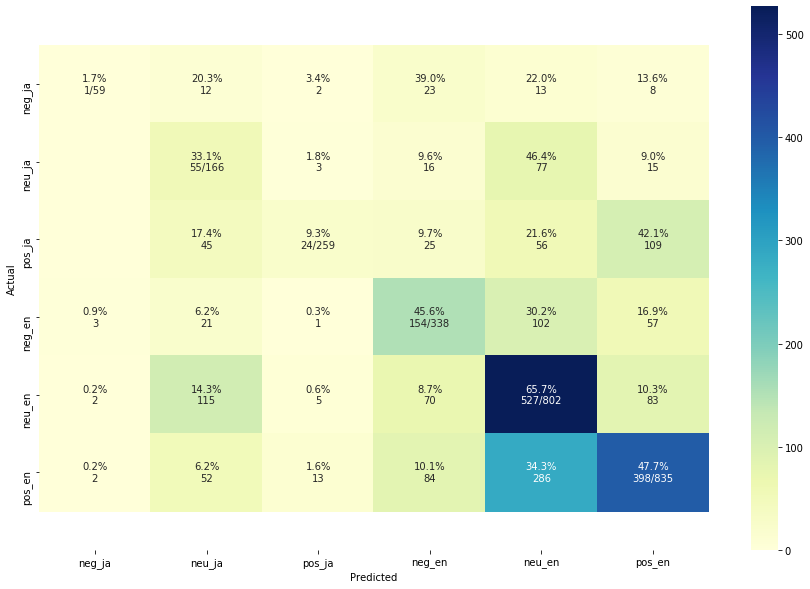

In [65]:
#Confusion matrix 
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt
import seaborn as sns
cf_matrix = confusion_matrix(y_test, y_pred)
class_names = ['neg_ja', 'neu_ja', 'pos_ja', 'neg_en', 'neu_en', 'pos_en']


def plot_cm(y_true, y_pred, figsize=(15,10)):
    cm = confusion_matrix(y_true, y_pred, labels=np.unique(y_true))
    cm_sum = np.sum(cm, axis=1, keepdims=True)
    cm_perc = cm / cm_sum.astype(float) * 100
    annot = np.empty_like(cm).astype(str)
    nrows, ncols = cm.shape
    for i in range(nrows):
        for j in range(ncols):
            c = cm[i, j]
            p = cm_perc[i, j]
            if i == j:
                s = cm_sum[i]
                annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)
            elif c == 0:
                annot[i, j] = ''
            else:
                annot[i, j] = '%.1f%%\n%d' % (p, c)
    cm = pd.DataFrame(cm, index=class_names, columns=class_names)
    cm.index.name = 'Actual'
    cm.columns.name = 'Predicted'
    fig, ax = plt.subplots(figsize=(15,10))
    ax = sns.heatmap(cm, cmap= "YlGnBu", annot=annot, fmt='', ax=ax)
    bottom, top = ax.get_ylim()
    ax.set_ylim(bottom + 0.5, top - 0.5)
    
plot_cm(y_test, y_pred)
plt.show()

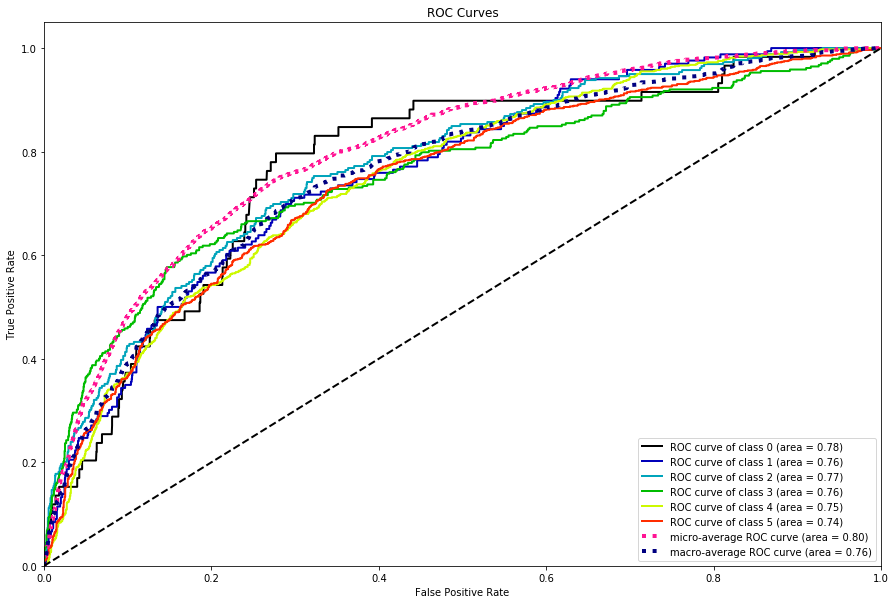

In [67]:
#ROC AUC
import scikitplot as scikitplot #to make things easy
y_pred_proba = loaded_model.predict_proba(X_test_vect)
scikitplot.metrics.plot_roc(y_test, y_pred_proba, figsize=(15,10))
plt.show()

In [68]:
from sklearn.metrics import roc_auc_score

y_prob = loaded_model.predict_proba(X_test_vect)

macro_roc_auc_ovo = roc_auc_score(y_test, y_prob, multi_class="ovo",
                                  average="macro")
weighted_roc_auc_ovo = roc_auc_score(y_test, y_prob, multi_class="ovo",
                                     average="weighted")
macro_roc_auc_ovr = roc_auc_score(y_test, y_prob, multi_class="ovr",
                                  average="macro")
weighted_roc_auc_ovr = roc_auc_score(y_test, y_prob, multi_class="ovr",
                                     average="weighted")
print("One-vs-One ROC AUC scores:\n{:.6f} (macro),\n{:.6f} "
      "(weighted by prevalence)"
      .format(macro_roc_auc_ovo, weighted_roc_auc_ovo))
print("One-vs-Rest ROC AUC scores:\n{:.6f} (macro),\n{:.6f} "
      "(weighted by prevalence)"
      .format(macro_roc_auc_ovr, weighted_roc_auc_ovr))

One-vs-One ROC AUC scores:
0.750978 (macro),
0.755713 (weighted by prevalence)
One-vs-Rest ROC AUC scores:
0.760683 (macro),
0.753369 (weighted by prevalence)


In [ ]:
###LDA Topic Modeling###

In [69]:
import sys
# !{sys.executable} -m spacy download en
import re, numpy as np, pandas as pd
from pprint import pprint

# Gensim
import gensim, spacy, logging, warnings
import gensim.corpora as corpora
from gensim.utils import lemmatize, simple_preprocess
from gensim.models import CoherenceModel


# NLTK Stop words
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['disneyland','tokyo','disney', 'im', 'tdrnow','paris','california','amp','disneysea','got',
                 'ºc', 'ºf', 'ºoº','𝗧𝗵𝗲','くまのプーさん', 'ディズニー', 'ディズニーシー','ディズニーハロウィーン',
                 'ディズニーランド', 'ディズニー好きと繋がりたい', 'フェスティバルオブミスティーク', 'マルマン',
                 'ㅋㅋㅋ', '場所', '更新', '月released', '東京ディズニーシー', '東京ディズニーランド', '東京ディズニーリゾート',
                 '香港迪士尼樂園', 'ºº', 'hong', 'kong',"disneylandresort", "disneyland", "disneyresort",
                  "californiaadventure",'downtowndisney','disneyanaheim','disneylandanaheim',
                  'disneycalifornia','californiadisney','disneysea', 'disneytokyo', 'disneytokyoresort', 
                  'tokyodisney','tokyodisneyresort', 'tokyodisneyland','東京ディズニーランド', 'ディズニーランド',
                  '東京ディズニーシー', 'ズニーシー', 'tdr_now', 'tdr_md','tdr','dca','dl', 'wdw','disneylandparis',
                  'theme_park', 'min', 'day', 'new', 'guy', 'year', 'way', 'part', 'thing', 'man','ティスニー',
                  'side', 'sia', 'ティスニーラント', 'ティスニーハロウィーン', 'today', 'wanna', 'place',
                  'world', 'disneyworld', 'next', 'disneypark', '東京ティスニーシー', 'yen',
                  '東京ティスニーラント', 'land', 'park', 'ティスニーシー', 'tdl', 'tdrmd', 'lot',
                  "東京ティスニーリソート"])

%matplotlib inline
warnings.filterwarnings("ignore",category=DeprecationWarning)
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

In [70]:
def sent_to_words(sentences):
    for sent in sentences:
        sent = re.sub('\S*@\S*\s?', '', sent)  # remove emails
        sent = re.sub('\s+', ' ', sent)  # remove newline chars
        sent = re.sub("\'", "", sent)  # remove single quotes
        sent = gensim.utils.simple_preprocess(str(sent), deacc=True) 
        yield(sent)  

# !python3 -m spacy download en  # run in terminal once
def process_words(texts, stop_words=stop_words, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """Remove Stopwords, Form Bigrams, Trigrams and Lemmatization"""
    texts = [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]
    texts = [bigram_mod[doc] for doc in texts]
    texts = [trigram_mod[bigram_mod[doc]] for doc in texts]
    texts_out = []
    nlp = spacy.load('en', disable=['parser', 'ner'])
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    # remove stopwords once more after lemmatization
    texts_out = [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts_out]    
    return texts_out

In [71]:
#For simpliclity lets not seperate positive and negative and by language
# Convert to list
data = df5.clean_text.values.tolist()
data_words = list(sent_to_words(data))       


# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=2, threshold=20) # higher threshold fewer phrases. Must show up more than 2 times the phrases 
trigram = gensim.models.Phrases(bigram[data_words], threshold=20)  
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

In [72]:
data_ready = process_words(data_words)  # processed Text Data!
data_ready[0:10]

[['nerd', 'kimoi', 'think', 'insane', 'creepy'],
 ['even',
  'get',
  'angry',
  'station',
  'staff',
  'ignore',
  'continue',
  'sleep',
  'sleep',
  'bag',
  'want',
  'know',
  'heart',
  'get',
  'bear'],
 ['may_doll',
  'affordable',
  'price',
  'fullscale',
  'price',
  'release',
  'good',
  'children',
  'boys_festival',
  'mickey',
  'mark',
  'armor',
  'mickey',
  'jpy',
  'carp',
  'streamer',
  'donald',
  'mischievous',
  'mikidona',
  'dignified',
  'bow',
  'sword',
  'decoration',
  'mickey'],
 ['kobe', 'tribute', 'thank'],
 ['donald',
  'last',
  'mickey',
  'children',
  'boys_festival',
  'acrylic',
  'stand',
  'officially',
  'list',
  'sale',
  'chip_dale',
  'carp',
  'streamer',
  'fan',
  'cap',
  'dale',
  'slinky',
  'dog',
  'hat',
  'ear',
  'hat',
  'minnie'],
 ['good',
  'morning',
  'maihama',
  'resort',
  'weather',
  'partly_cloudy',
  'degree',
  'rainy',
  'percent',
  'japan',
  'meteorological',
  'agency',
  'click',
  'weather',
  'forecast'

In [73]:
# Create Dictionary
id2word = corpora.Dictionary(data_ready)

# Create Corpus: Term Document Frequency
corpus = [id2word.doc2bow(text) for text in data_ready]

In [74]:
#4 Topics
lda_model4 = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=4, 
                                           random_state=777,
                                           update_every=1,
                                           chunksize=10,
                                           passes=10,
                                           alpha='symmetric',
                                           iterations=20,
                                           per_word_topics=True)

In [75]:
pprint(lda_model4.print_topics())

[(0,
  '0.026*"want" + 0.023*"look" + 0.023*"see" + 0.020*"cry" + 0.018*"know" + '
  '0.015*"say" + 0.014*"ticket" + 0.014*"fan" + 0.013*"snite" + 0.012*"first"'),
 (1,
  '0.029*"get" + 0.019*"trip" + 0.014*"together" + 0.013*"happy" + '
  '0.011*"people" + 0.011*"probably" + 0.010*"sound" + 0.008*"play" + '
  '0.008*"never" + 0.007*"may"'),
 (2,
  '0.045*"go" + 0.021*"love" + 0.016*"also" + 0.015*"take" + 0.014*"nite" + '
  '0.011*"think" + 0.011*"time" + 0.011*"ever" + 0.011*"ride" + 0.009*"photo"'),
 (3,
  '0.024*"night" + 0.017*"would" + 0.014*"dlr" + 0.013*"good" + 0.011*"need" + '
  '0.011*"lol" + 0.011*"work" + 0.010*"given_away" + 0.010*"fastpasse" + '
  '0.009*"anything"')]


In [76]:
#7 Topics
lda_model7 = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=7, 
                                           random_state=777,
                                           update_every=1,
                                           chunksize=10,
                                           passes=10,
                                           alpha='symmetric',
                                           iterations=20,
                                           per_word_topics=True)

In [77]:
pprint(lda_model7.print_topics())

[(0,
  '0.047*"want" + 0.044*"get" + 0.033*"know" + 0.026*"ticket" + '
  '0.020*"dark_nite" + 0.020*"show" + 0.019*"close" + 0.016*"ask" + '
  '0.015*"could" + 0.013*"play"'),
 (1,
  '0.045*"look" + 0.045*"see" + 0.038*"cry" + 0.023*"first" + 0.021*"make" + '
  '0.021*"happy" + 0.018*"people" + 0.017*"wait" + 0.016*"anything" + '
  '0.014*"try"'),
 (2,
  '0.081*"go" + 0.026*"nite" + 0.023*"snite" + 0.020*"kid" + 0.020*"think" + '
  '0.020*"time" + 0.019*"ride" + 0.017*"photo" + 0.015*"event" + 0.015*"meet"'),
 (3,
  '0.043*"night" + 0.032*"take" + 0.026*"dlr" + 0.023*"ever" + 0.021*"need" + '
  '0.019*"fastpasse" + 0.019*"given_away" + 0.013*"favorite" + 0.012*"fun" + '
  '0.012*"hand"'),
 (4,
  '0.049*"love" + 0.034*"would" + 0.026*"good" + 0.022*"work" + 0.018*"minnie" '
  '+ 0.016*"maybe" + 0.016*"last" + 0.015*"give" + 0.015*"parade" + '
  '0.014*"morning"'),
 (5,
  '0.034*"also" + 0.029*"fan" + 0.024*"together" + 0.021*"lol" + '
  '0.017*"cant_wait" + 0.017*"sound" + 0.017*"come" 

In [78]:
#Final Model 

#4 Topics
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=4, 
                                           random_state=777,
                                           update_every=1,
                                           chunksize=10,
                                           passes=10,
                                           alpha='symmetric',
                                           iterations=100,
                                            per_word_topics=True)

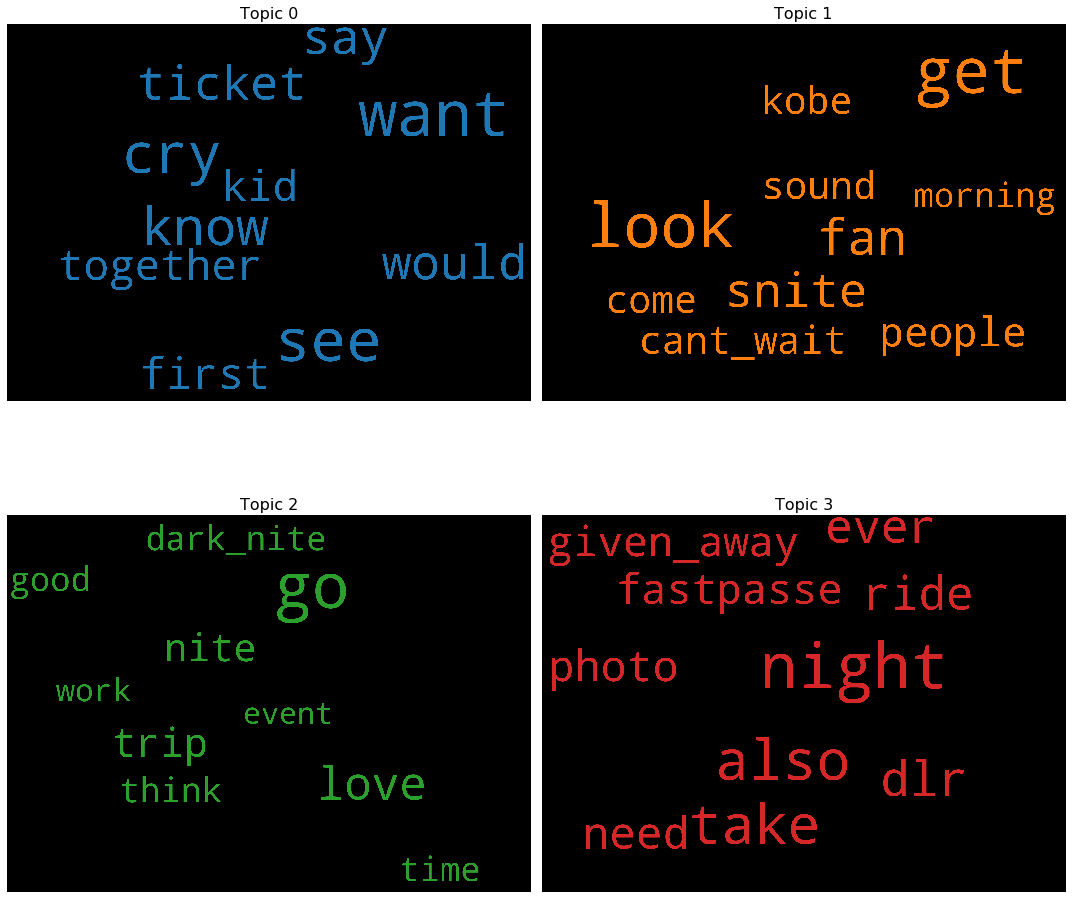

In [79]:
# 1. Wordcloud of Top N words in each topic
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=stop_words,
                  background_color='black',
                  width=2500,
                  height=1800,
                  max_words=20,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = lda_model.show_topics(formatted=False)

fig, axes = plt.subplots(2, 2, figsize=(15,15), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

In [80]:
def format_topics_sentences(ldamodel=None, corpus=corpus, texts=data):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row_list in enumerate(ldamodel[corpus]):
        row = row_list[0] if ldamodel.per_word_topics else row_list            
        # print(row)
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=data_ready)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']

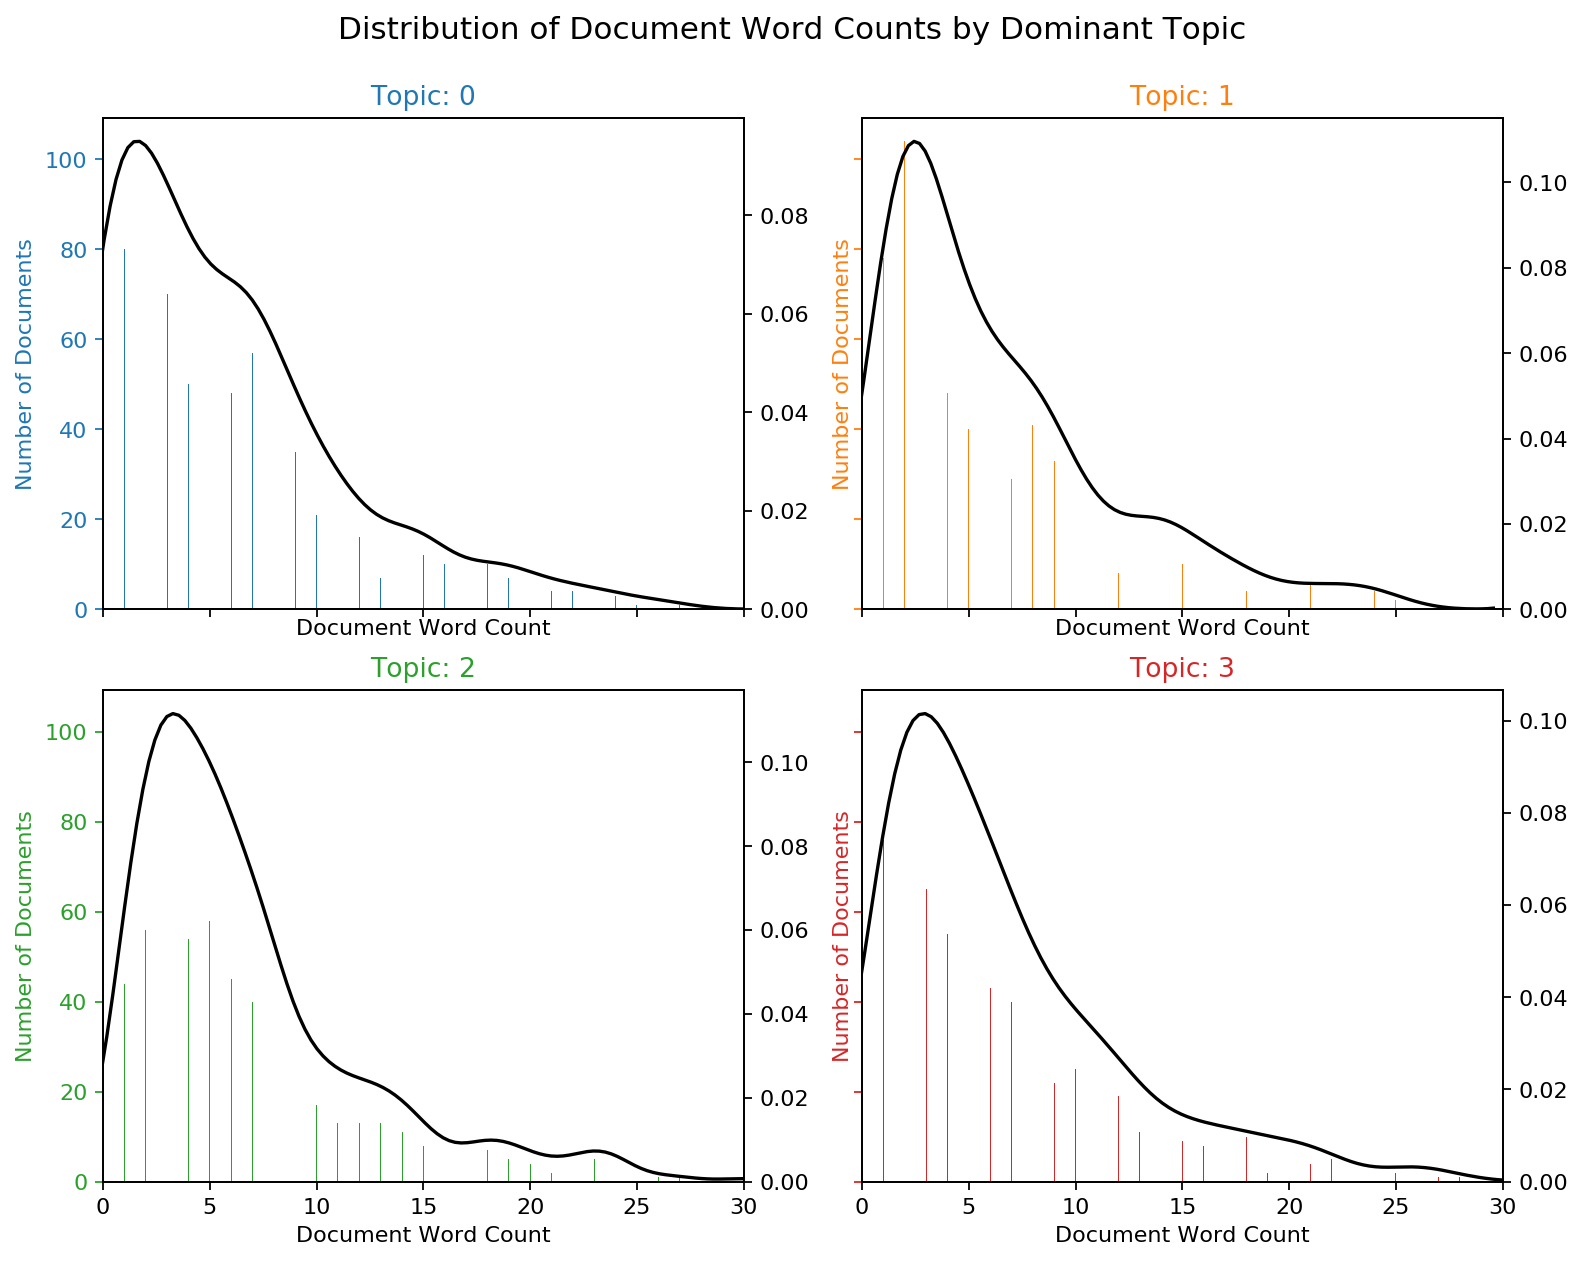

In [81]:
import seaborn as sns
import matplotlib.colors as mcolors
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

fig, axes = plt.subplots(2,2,figsize=(10,8), dpi=160, sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):    
    df_dominant_topic_sub = df_dominant_topic.loc[df_dominant_topic.Dominant_Topic == i, :]
    doc_lens = [len(d) for d in df_dominant_topic_sub.Text]
    ax.hist(doc_lens, bins = 1000, color=cols[i])
    ax.tick_params(axis='y', labelcolor=cols[i], color=cols[i])
    sns.kdeplot(doc_lens, color="black", shade=False, ax=ax.twinx())
    ax.set(xlim=(0, 30), xlabel='Document Word Count')
    ax.set_ylabel('Number of Documents', color=cols[i])
    ax.set_title('Topic: '+str(i), fontdict=dict(size=12, color=cols[i]))

fig.tight_layout()
fig.subplots_adjust(top=0.90)
fig.suptitle('Distribution of Document Word Counts by Dominant Topic', fontsize=14)
plt.show()

In [82]:
# Get topic weights and dominant topics ------------
from sklearn.manifold import TSNE
from bokeh.plotting import figure, output_file, show
from bokeh.models import Label
from bokeh.io import output_notebook

# Get topic weights
topic_weights = []
for i, row_list in enumerate(lda_model[corpus]):
    topic_weights.append([w for i, w in row_list[0]])

# Array of topic weights    
arr = pd.DataFrame(topic_weights).fillna(0).values

# Keep the well separated points (optional)
arr = arr[np.amax(arr, axis=1) > 0.35]

# Dominant topic number in each doc
topic_num = np.argmax(arr, axis=1)

# tSNE Dimension Reduction
tsne_model = TSNE(n_components=2, verbose=1, random_state= 77, angle=.99, init='pca')
tsne_lda = tsne_model.fit_transform(arr)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 2275 samples in 0.001s...
[t-SNE] Computed neighbors for 2275 samples in 0.048s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2275
[t-SNE] Computed conditional probabilities for sample 2000 / 2275
[t-SNE] Computed conditional probabilities for sample 2275 / 2275
[t-SNE] Mean sigma: 0.000071
[t-SNE] KL divergence after 250 iterations with early exaggeration: 58.710312
[t-SNE] KL divergence after 1000 iterations: 0.440836


In [83]:
def explore_topic(lda_model, topic_number, topn, output=True):
    """
    accept a ldamodel, atopic number and topn vocabs of interest
    prints a formatted list of the topn terms
    """
    terms = []
    for term, frequency in lda_model.show_topic(topic_number, topn=topn):
        terms += [term]
        if output:
            print(u'{:20} {:.3f}'.format(term, round(frequency, 3)))
    
    return terms

In [84]:
num_topics = 4
topic_summaries = []
print(u'{:20} {}'.format(u'term', u'frequency') + u'\n')
for i in range(num_topics):
    print('Topic '+str(i)+' |---------------------\n')
    tmp = explore_topic(lda_model,topic_number=i, topn=10, output=True )
#     print tmp[:5]
    topic_summaries += [tmp[:5]]
    print

term                 frequency

Topic 0 |---------------------

want                 0.024
see                  0.022
cry                  0.019
know                 0.017
say                  0.014
would                0.014
ticket               0.013
first                0.011
together             0.011
kid                  0.011
Topic 1 |---------------------

get                  0.029
look                 0.028
fan                  0.017
snite                0.015
people               0.011
cant_wait            0.010
come                 0.010
sound                0.010
kobe                 0.010
morning              0.007
Topic 2 |---------------------

go                   0.046
love                 0.021
trip                 0.016
nite                 0.015
think                0.011
good                 0.011
time                 0.011
dark_nite            0.011
work                 0.010
event                0.009
Topic 3 |---------------------

night                0.024
als

In [85]:
# Plot the Topic Clusters using Bokeh
output_notebook()
n_topics = 4
mycolors = np.array([color for name, color in mcolors.TABLEAU_COLORS.items()])
plot = figure(title="t-SNE Clustering of {} LDA Topics".format(n_topics), 
              plot_width=900, plot_height=700,tools="pan,wheel_zoom,box_zoom,reset,hover,previewsave")
plot.scatter(x=tsne_lda[:,0], y=tsne_lda[:,1], color=mycolors[topic_num])

show(plot)

Loading BokehJS ...

In [86]:
import pyLDAvis.gensim
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, dictionary=lda_model.id2word)
vis

PreparedData(topic_coordinates=       x  y  topics  cluster  Freq
topic                             
0     -0 0   1       1       27   
3     0  -0  2       1       25   
1     0  -0  3       1       25   
2     0  0   4       1       23   , topic_info=     Category  Freq       Term  Total  loglift  logprob
623   Default 169    go        169    30       30      
10    Default 113    get       113    29       29      
219   Default 109    look      109    28       28      
17    Default 103    want      103    27       27      
813   Default 93     night     93     26       26      
...       ... ..       ...     ..     ..       ..      
3652  Topic4  20     grande    21     1        -5      
1568  Topic4  18     begin     19     1        -5      
1637  Topic4  20     downtown  21     1        -5      
1453  Topic4  19     different 20     1        -5      
2881  Topic4  19     jealous   20     1        -5      

[162 rows x 6 columns], token_table=      Topic  Freq       Term
term                        
1086  2     1      actually 
1334  3     1      adventure
304   2     1      also     
1219  3     1      always   
260   2     1      anyone   
...  ..     ..        ...   
672   1     1      watch    
180   3     1      wear     
512   3     1      week     
360   4     1      work     
275   1     1      would    

[146 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 4, 2, 3])